In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
import matplotlib.pyplot as plt

In [16]:
#data = pd.read_csv('auto-mpg.csv')
data=pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')

In [17]:
# Remove columns with NaN values
data = data.drop(['Year', 'Month','Flag'], axis=1)

# Map 'Age Group' to numeric values
age_group_mapping = {label: idx for idx, label in enumerate(data['Age Group'].unique())}
data['Age Group Numeric'] = data['Age Group'].map(age_group_mapping)

# Display the updated DataFrame
#print(data.head())
data.head(15)

Data As Of  Start Date    End Date     Group          State  \
0   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
1   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
2   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
3   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
4   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
5   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
6   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
7   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
8   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
9   09/24/2023  01/01/2020  09/23/2023  By Total  United States   
10  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
11  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
12  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
13  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
14  09/24/2023  01/01/2020  09/23/2023  By Total  United States   

         Condition Group                           Condition ICD10_codes  \
0   Respiratory diseases             Influenza and pneumonia     J09-J18   
1   Respiratory diseases             Influenza and pneumonia     J09-J18   
2   Respiratory diseases             Influenza and pneumonia     J09-J18   
3   Respiratory diseases             Influenza and pneumonia     J09-J18   
4   Respiratory diseases             Influenza and pneumonia     J09-J18   
5   Respiratory diseases             Influenza and pneumonia     J09-J18   
6   Respiratory diseases             Influenza and pneumonia     J09-J18   
7   Respiratory diseases             Influenza and pneumonia     J09-J18   
8   Respiratory diseases             Influenza and pneumonia     J09-J18   
9   Respiratory diseases             Influenza and pneumonia     J09-J18   
10  Respiratory diseases  Chronic lower respiratory diseases     J40-J47   
11  Respiratory diseases  Chronic lower respiratory diseases     J40-J47   
12  Respiratory diseases  Chronic lower respiratory diseases     J40-J47   
13  Respiratory diseases  Chronic lower respiratory diseases     J40-J47   
14  Respiratory diseases  Chronic lower respiratory diseases     J40-J47   

     Age Group  COVID-19 Deaths  Number of Mentions  Age Group Numeric  
0         0-24           1569.0              1647.0                  0  
1        25-34           5804.0              6029.0                  1  
2        35-44          15080.0             15699.0                  2  
3        45-54          37414.0             38878.0                  3  
4        55-64          82668.0             85708.0                  4  
5        65-74         129005.0            133088.0                  5  
6        75-84         138503.0            141868.0                  6  
7          85+         121119.0            123018.0                  7  
8   Not stated             12.0                12.0                  8  
9     All Ages         531174.0            545947.0                  9  
10        0-24            207.0               212.0                  0  
11       25-34            459.0               465.0                  1  
12       35-44           1118.0              1144.0                  2  
13       45-54           3286.0              3398.0                  3  
14       55-64          12772.0             13418.0                  4

In [18]:
data.head()

Data As Of  Start Date    End Date     Group          State  \
0  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
1  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
2  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
3  09/24/2023  01/01/2020  09/23/2023  By Total  United States   
4  09/24/2023  01/01/2020  09/23/2023  By Total  United States   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
2  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
3  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
4  Respiratory diseases  Influenza and pneumonia     J09-J18     55-64   

   COVID-19 Deaths  Number of Mentions  Age Group Numeric  
0           1569.0              1647.0                  0  
1           5804.0              6029.0                  1  
2          15080.0             15699.0                  2  
3          37414.0             38878.0                  3  
4          82668.0             85708.0                  4

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   State               621000 non-null  object 
 5   Condition Group     621000 non-null  object 
 6   Condition           621000 non-null  object 
 7   ICD10_codes         621000 non-null  object 
 8   Age Group           621000 non-null  object 
 9   COVID-19 Deaths     437551 non-null  float64
 10  Number of Mentions  443423 non-null  float64
 11  Age Group Numeric   621000 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 56.9+ MB


In [20]:
data.describe()

COVID-19 Deaths  Number of Mentions  Age Group Numeric
count     4.375510e+05        4.434230e+05      621000.000000
mean      1.201179e+02        1.293348e+02           4.500000
std       2.980201e+03        3.203936e+03           2.872284
min       0.000000e+00        0.000000e+00           0.000000
25%       0.000000e+00        0.000000e+00           2.000000
50%       0.000000e+00        0.000000e+00           4.500000
75%       1.800000e+01        1.900000e+01           7.000000
max       1.146242e+06        1.146242e+06           9.000000

In [21]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation only on the numerical columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   State               621000 non-null  object 
 5   Condition Group     621000 non-null  object 
 6   Condition           621000 non-null  object 
 7   ICD10_codes         621000 non-null  object 
 8   Age Group           621000 non-null  object 
 9   COVID-19 Deaths     621000 non-null  float64
 10  Number of Mentions  621000 non-null  float64
 11  Age Group Numeric   621000 non-null  float64
dtypes: float64(3), object(9)
memory usage: 56.9+ MB


In [23]:
# Convert "Condition Group" column to numeric using integer encoding in the original dataframe 'data'
condition_group_mapping = {label: idx for idx, label in enumerate(data['Condition Group'].unique())}
data['Condition Group Numeric'] = data['Condition Group'].map(condition_group_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)


# Convert "Condition" column to numeric using integer encoding
age_Group_mapping = {label: idx for idx, label in enumerate(data['Age Group'].unique())}
data['Age Group Numeric'] = data['Age Group'].map(age_Group_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)




# Create a mapping summary for the "Condition" column
condition_mapping_summary = pd.DataFrame(list(condition_mapping.items()), columns=['Condition', 'Numeric Value'])
condition_mapping_summary2 = pd.DataFrame(list(condition_group_mapping.items()), columns=['Condition Group', 'Numeric Value'])

#concatenate=pd.concat([condition_mapping_summary,condition_mapping_summary2])
condition_mapping_summary






Condition  Numeric Value
0                             Influenza and pneumonia              0
1                  Chronic lower respiratory diseases              1
2                 Adult respiratory distress syndrome              2
3                                 Respiratory failure              3
4                                  Respiratory arrest              4
5            Other diseases of the respiratory system              5
6                               Hypertensive diseases              6
7                              Ischemic heart disease              7
8                                      Cardiac arrest              8
9                                  Cardiac arrhythmia              9
10                                      Heart failure             10
11                           Cerebrovascular diseases             11
12           Other diseases of the circulatory system             12
13                                             Sepsis             13
14                                Malignant neoplasms             14
15                                           Diabetes             15
16                                            Obesity             16
17                                  Alzheimer disease             17
18                  Vascular and unspecified dementia             18
19                                      Renal failure             19
20  Intentional and unintentional injury, poisonin...             20
21         All other conditions and causes (residual)             21
22                                           COVID-19             22

In [24]:
condition_mapping_summary2

Condition Group  Numeric Value
0                                Respiratory diseases              0
1                                Circulatory diseases              1
2                                              Sepsis              2
3                                 Malignant neoplasms              3
4                                            Diabetes              4
5                                             Obesity              5
6                                   Alzheimer disease              6
7                   Vascular and unspecified dementia              7
8                                       Renal failure              8
9   Intentional and unintentional injury, poisonin...              9
10         All other conditions and causes (residual)             10
11                                           COVID-19             11

In [25]:
data.drop(columns=['Condition Group', 'Condition'])


Data As Of  Start Date    End Date     Group          State  \
0       09/24/2023  01/01/2020  09/23/2023  By Total  United States   
1       09/24/2023  01/01/2020  09/23/2023  By Total  United States   
2       09/24/2023  01/01/2020  09/23/2023  By Total  United States   
3       09/24/2023  01/01/2020  09/23/2023  By Total  United States   
4       09/24/2023  01/01/2020  09/23/2023  By Total  United States   
...            ...         ...         ...       ...            ...   
620995  09/24/2023  05/01/2023  05/31/2023  By Month    Puerto Rico   
620996  09/24/2023  06/01/2023  06/30/2023  By Month    Puerto Rico   
620997  09/24/2023  07/01/2023  07/31/2023  By Month    Puerto Rico   
620998  09/24/2023  08/01/2023  08/31/2023  By Month    Puerto Rico   
620999  09/24/2023  09/01/2023  09/23/2023  By Month    Puerto Rico   

       ICD10_codes Age Group  COVID-19 Deaths  Number of Mentions  \
0          J09-J18      0-24           1569.0              1647.0   
1          J09-J18     25-34           5804.0              6029.0   
2          J09-J18     35-44          15080.0             15699.0   
3          J09-J18     45-54          37414.0             38878.0   
4          J09-J18     55-64          82668.0             85708.0   
...            ...       ...              ...                 ...   
620995        U071  All Ages             67.0                67.0   
620996        U071  All Ages            122.0               122.0   
620997        U071  All Ages            114.0               114.0   
620998        U071  All Ages             78.0                78.0   
620999        U071  All Ages             36.0                36.0   

        Age Group Numeric  Condition Group Numeric  Condition Numeric  
0                       0                        0                  0  
1                       1                        0                  0  
2                       2                        0                  0  
3                       3                        0                  0  
4                       4                        0                  0  
...                   ...                      ...                ...  
620995                  9                       11                 22  
620996                  9                       11                 22  
620997                  9                       11                 22  
620998                  9                       11                 22  
620999                  9                       11                 22  

[621000 rows x 12 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Data As Of               621000 non-null  object 
 1   Start Date               621000 non-null  object 
 2   End Date                 621000 non-null  object 
 3   Group                    621000 non-null  object 
 4   State                    621000 non-null  object 
 5   Condition Group          621000 non-null  object 
 6   Condition                621000 non-null  object 
 7   ICD10_codes              621000 non-null  object 
 8   Age Group                621000 non-null  object 
 9   COVID-19 Deaths          621000 non-null  float64
 10  Number of Mentions       621000 non-null  float64
 11  Age Group Numeric        621000 non-null  int64  
 12  Condition Group Numeric  621000 non-null  int64  
 13  Condition Numeric        621000 non-null  int64  
dtypes: f

In [28]:
#data.to_csv('C:/Users/csrth/Downloads/modified_dataset.csv', index=False)

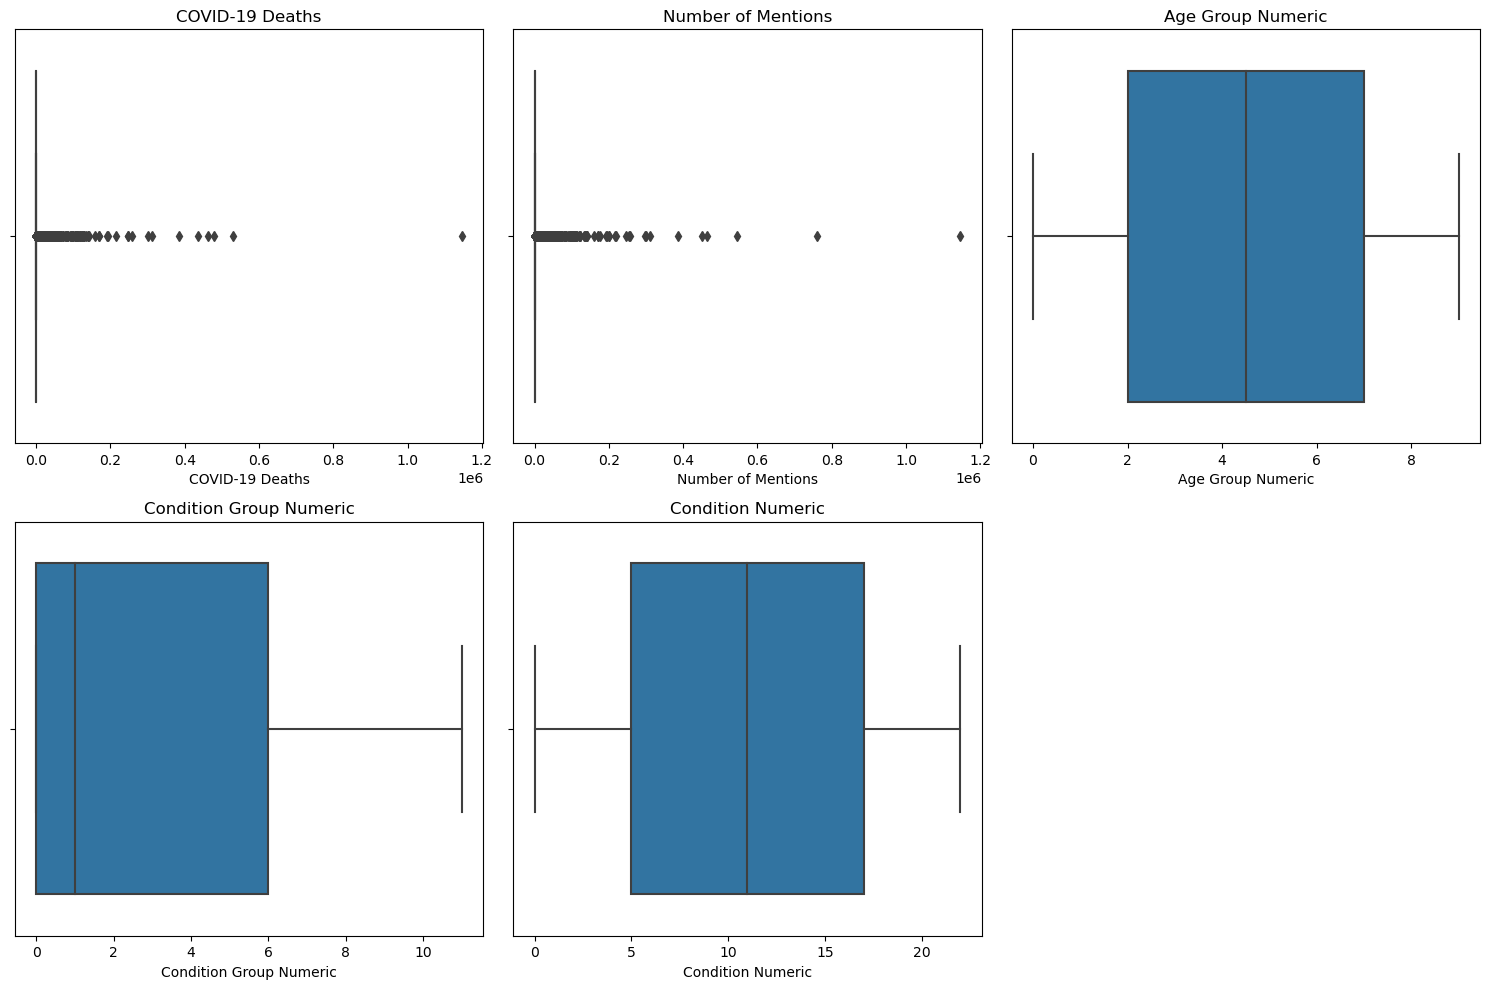

In [29]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = data.select_dtypes(include=['int', 'float',]).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Segmentation analysis

In [34]:
# Segmentation Analysis

# 1. Analysis by Age Group
age_group_analysis = data.groupby('Age Group')['COVID-19 Deaths'].sum().sort_values(ascending=False)
age_group_analysis

# Segmentation Analysis by Region, Condition, and Age Group
segmentation_analysis = data.groupby(['State', 'Condition Group', 'Age Group'])['COVID-19 Deaths'].sum().reset_index()

# Display the segmentation analysis
print(segmentation_analysis)





        State                             Condition Group   Age Group  \
0     Alabama  All other conditions and causes (residual)        0-24   
1     Alabama  All other conditions and causes (residual)       25-34   
2     Alabama  All other conditions and causes (residual)       35-44   
3     Alabama  All other conditions and causes (residual)       45-54   
4     Alabama  All other conditions and causes (residual)       55-64   
...       ...                                         ...         ...   
6475  Wyoming           Vascular and unspecified dementia       65-74   
6476  Wyoming           Vascular and unspecified dementia       75-84   
6477  Wyoming           Vascular and unspecified dementia         85+   
6478  Wyoming           Vascular and unspecified dementia    All Ages   
6479  Wyoming           Vascular and unspecified dementia  Not stated   

      COVID-19 Deaths  
0         2125.429646  
1         3679.408262  
2         3157.284453  
3         3427.519023  
4  

In [31]:
# 2. Analysis by State
state_analysis = data.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False)
state_analysis



State
United States           2.650162e+07
California              3.063053e+06
Texas                   2.771015e+06
Florida                 2.234918e+06
Pennsylvania            1.540844e+06
Ohio                    1.443511e+06
New York                1.299361e+06
Illinois                1.252359e+06
Georgia                 1.207324e+06
New Jersey              1.206587e+06
Michigan                1.150335e+06
North Carolina          1.142669e+06
New York City           1.140065e+06
Arizona                 1.105533e+06
Tennessee               1.069242e+06
Indiana                 1.026934e+06
South Carolina          9.037473e+05
Kentucky                8.988794e+05
Missouri                8.974005e+05
Alabama                 8.835476e+05
Massachusetts           8.719110e+05
Oklahoma                8.706915e+05
Virginia                8.643374e+05
Maryland                8.392325e+05
Louisiana               8.320817e+05
Wisconsin               8.141593e+05
Colorado                8.131940

In [32]:
# 3. Analysis by Condition Group
condition_group_analysis = data.groupby('Condition Group')['COVID-19 Deaths'].sum().sort_values(ascending=False)
condition_group_analysis

Condition Group
Respiratory diseases                                                         2.076081e+07
Circulatory diseases                                                         1.641285e+07
COVID-19                                                                     1.454668e+07
All other conditions and causes (residual)                                   6.456795e+06
Diabetes                                                                     3.007487e+06
Renal failure                                                                2.528573e+06
Sepsis                                                                       2.446768e+06
Malignant neoplasms                                                          1.811613e+06
Vascular and unspecified dementia                                            1.736683e+06
Obesity                                                                      1.670286e+06
Intentional and unintentional injury, poisoning, and other adverse events    1.27156

# Time series analysis

<Figure size 1500x600 with 0 Axes>

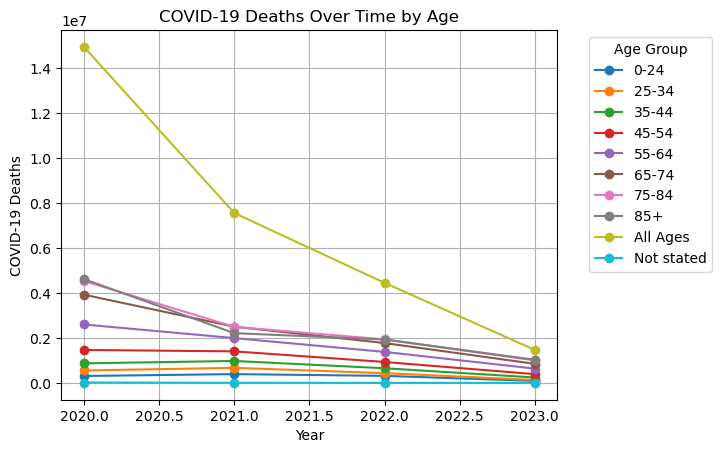

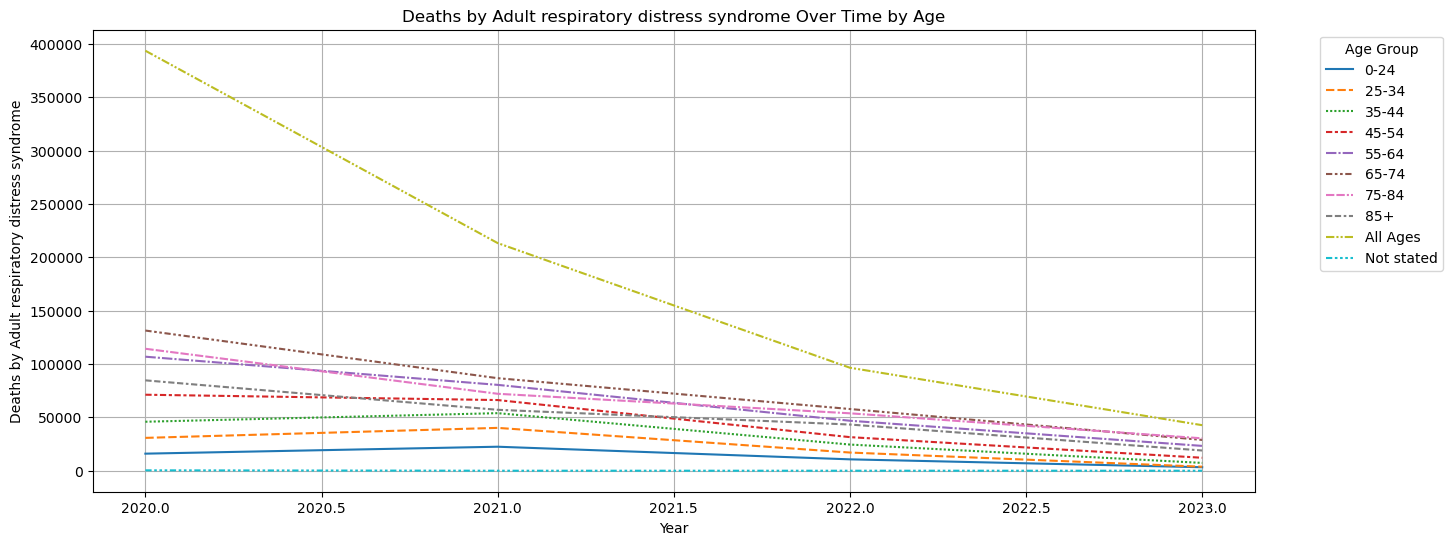

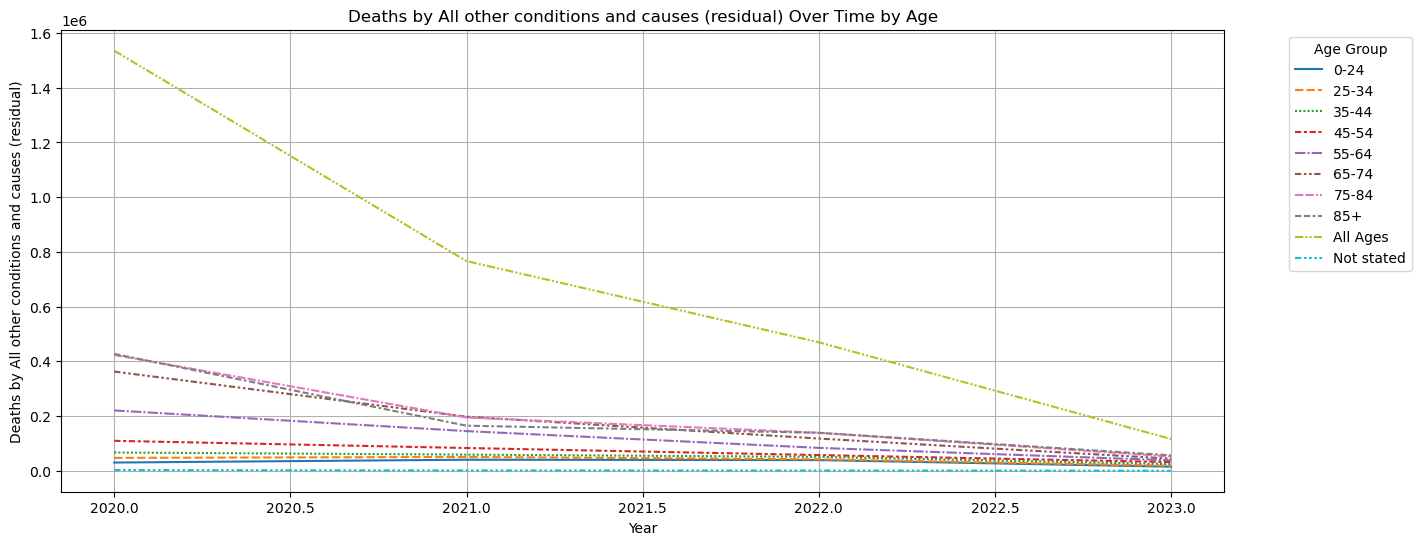

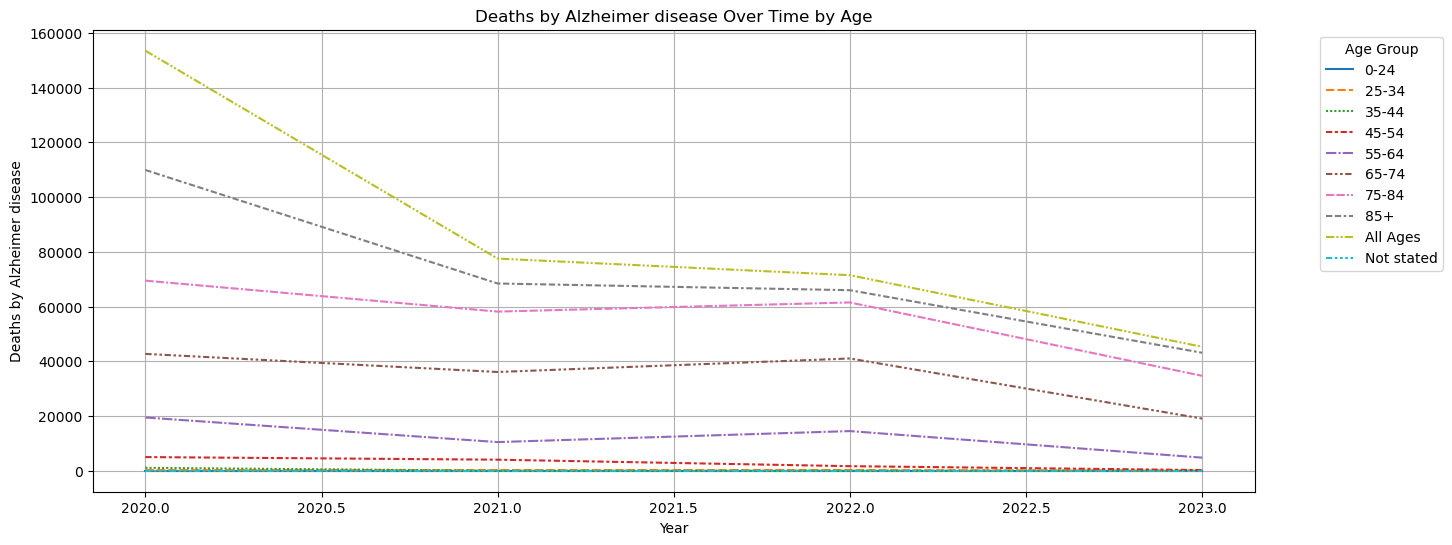

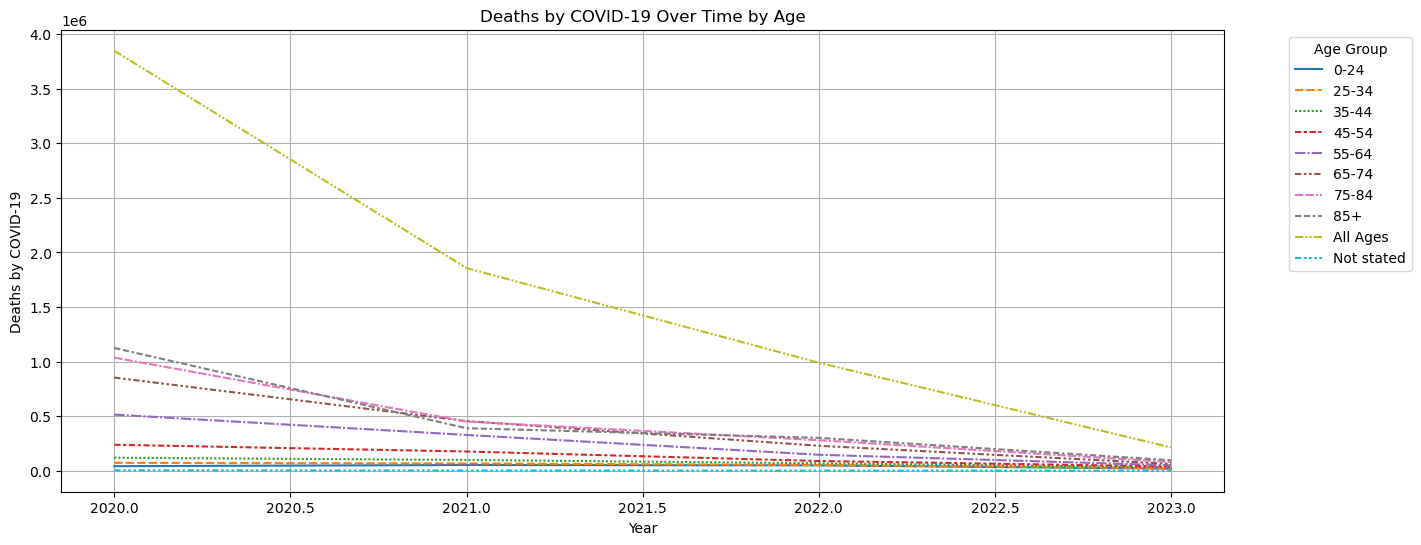

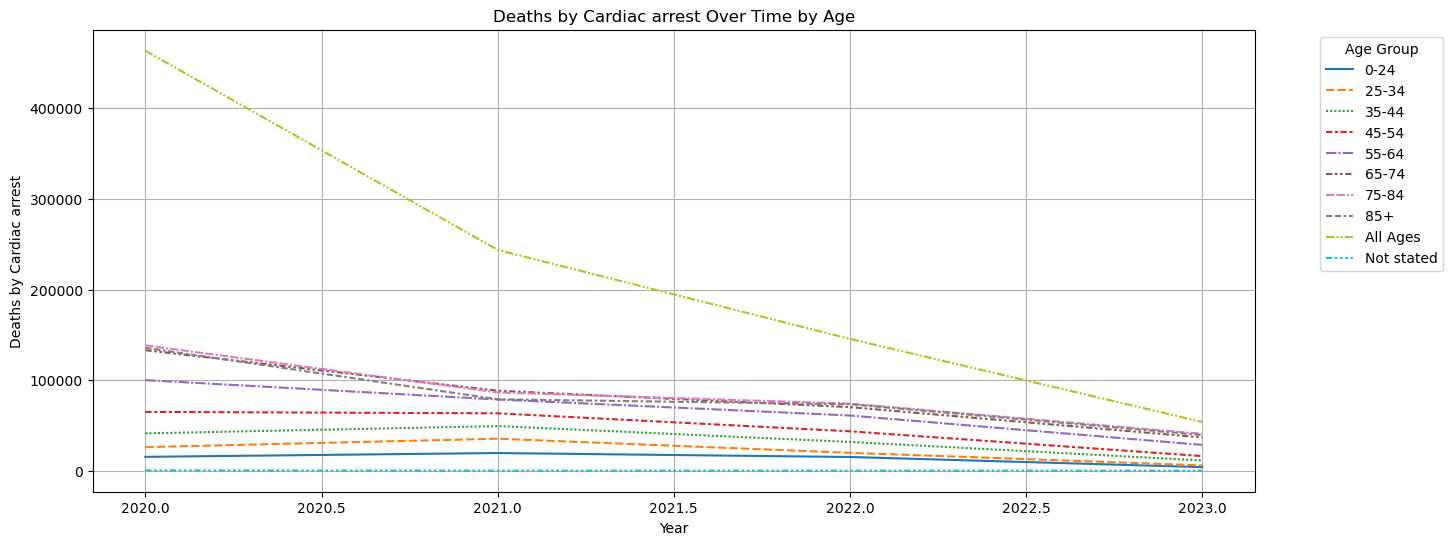

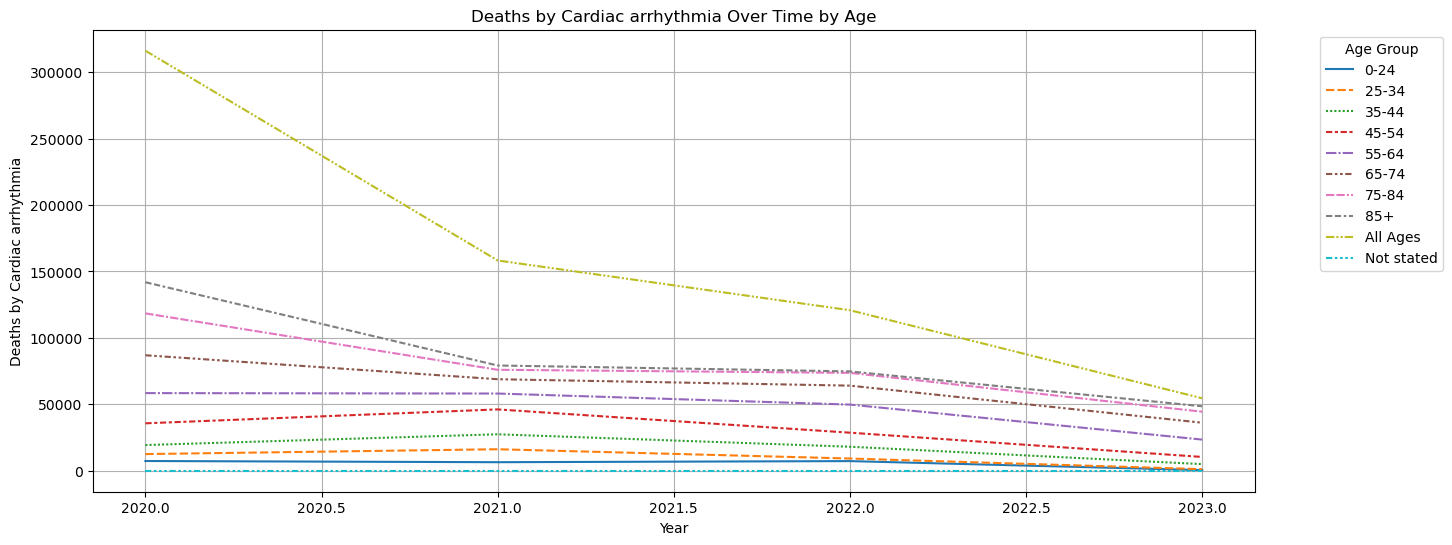

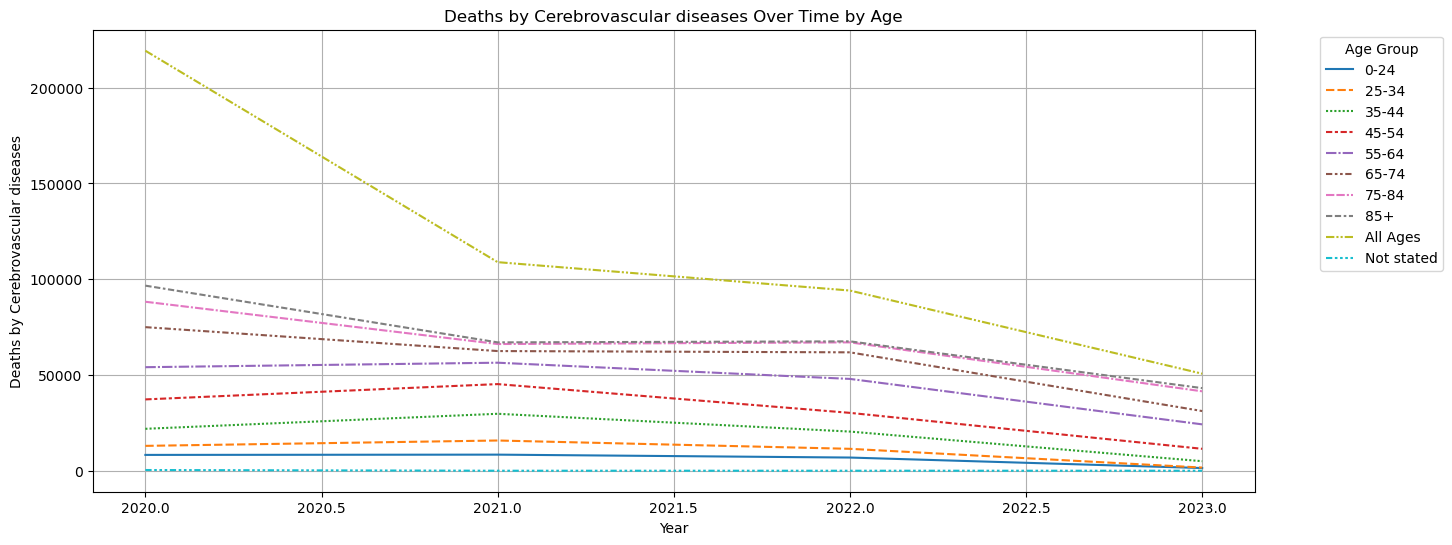

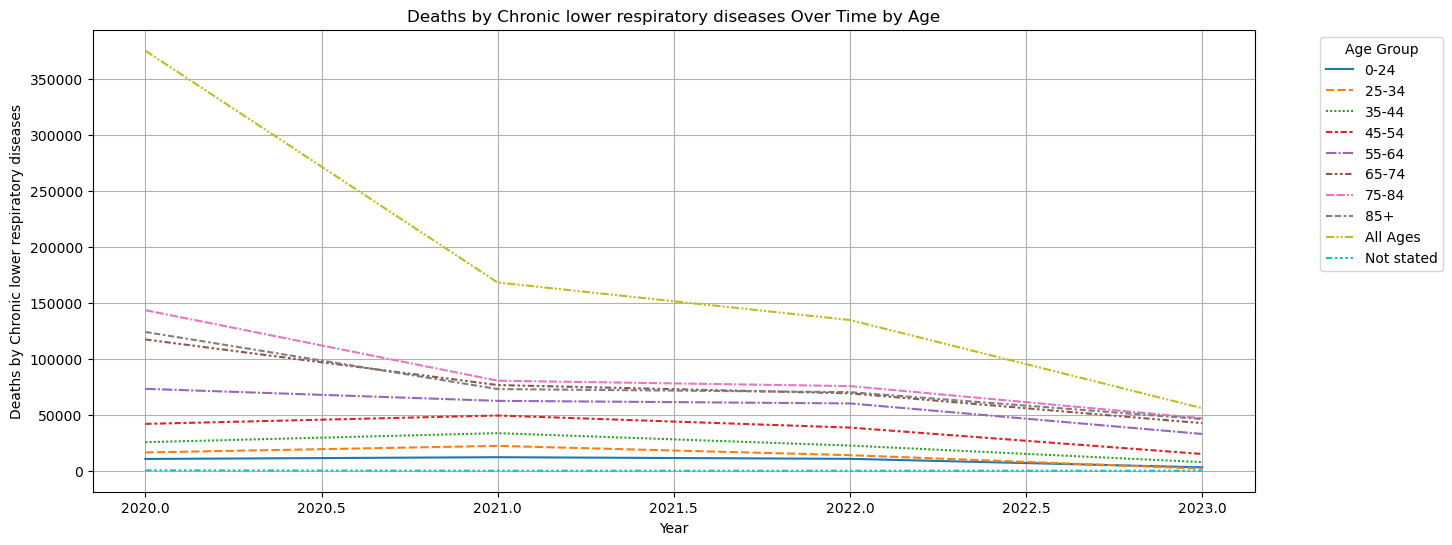

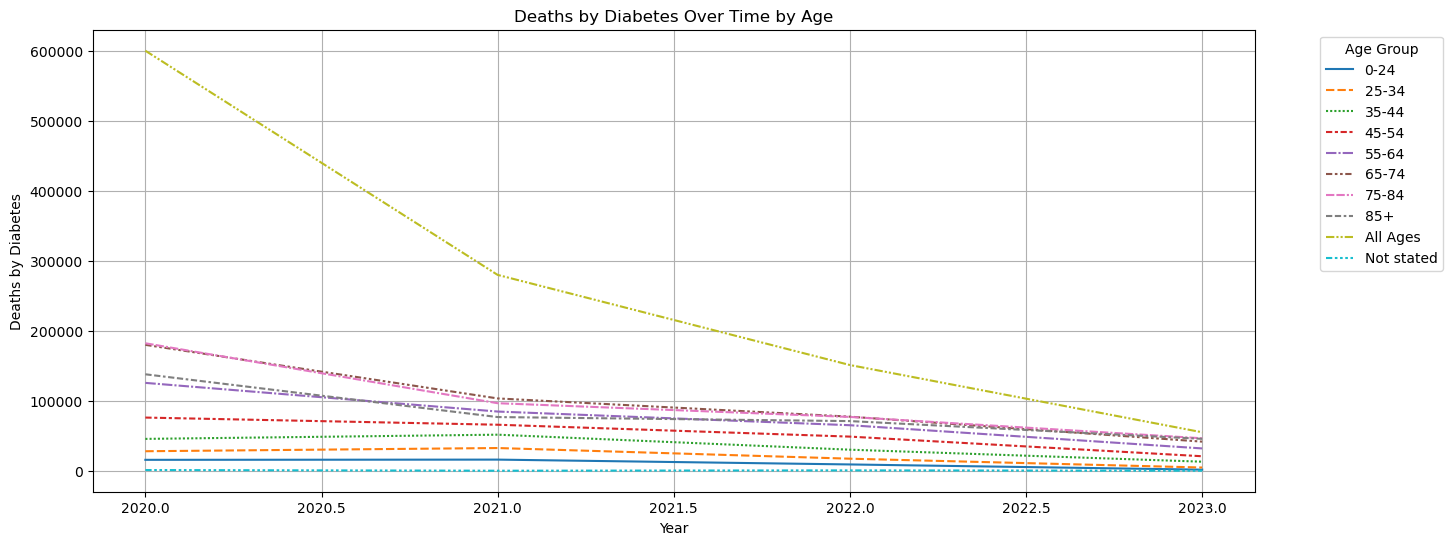

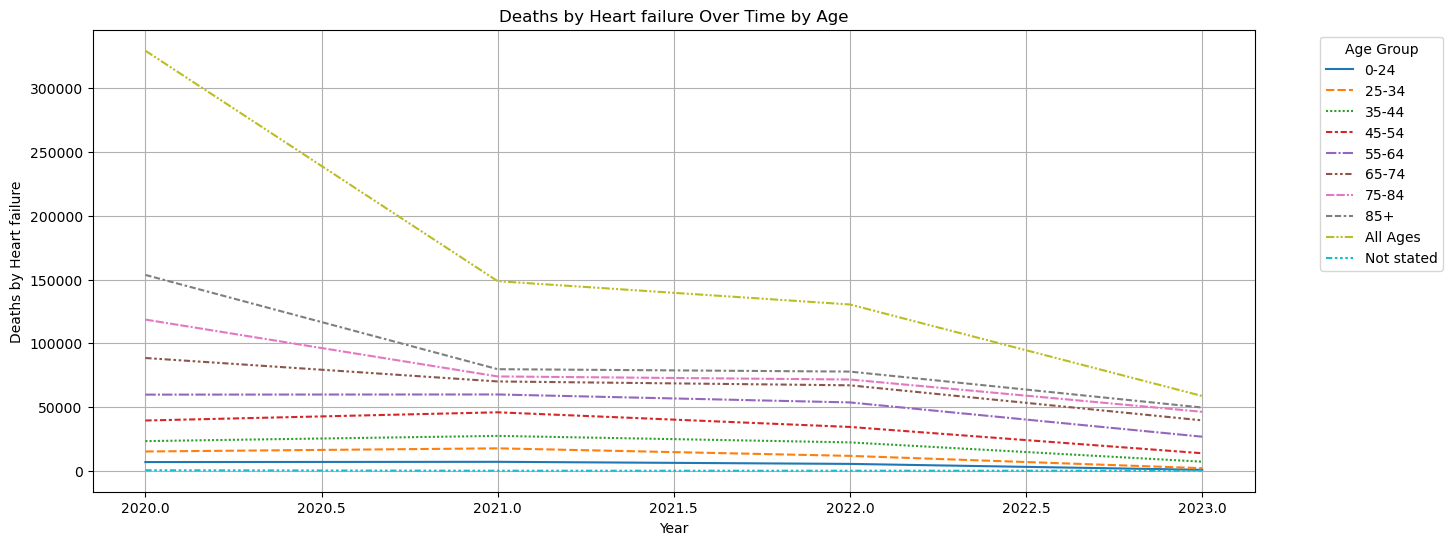

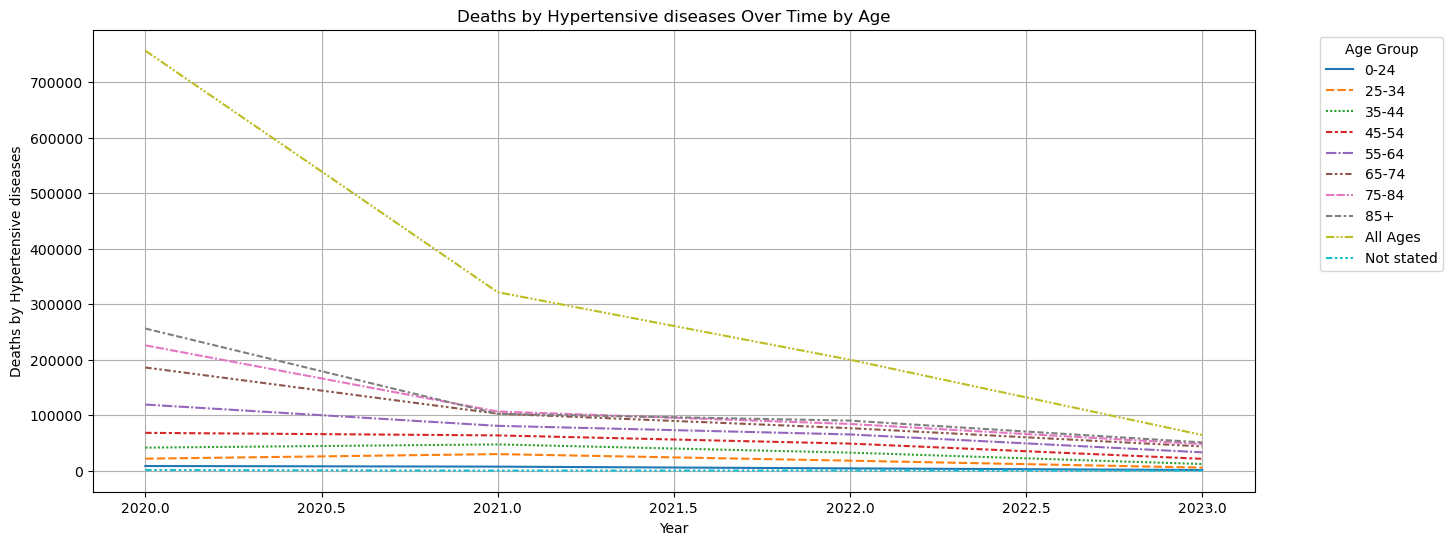

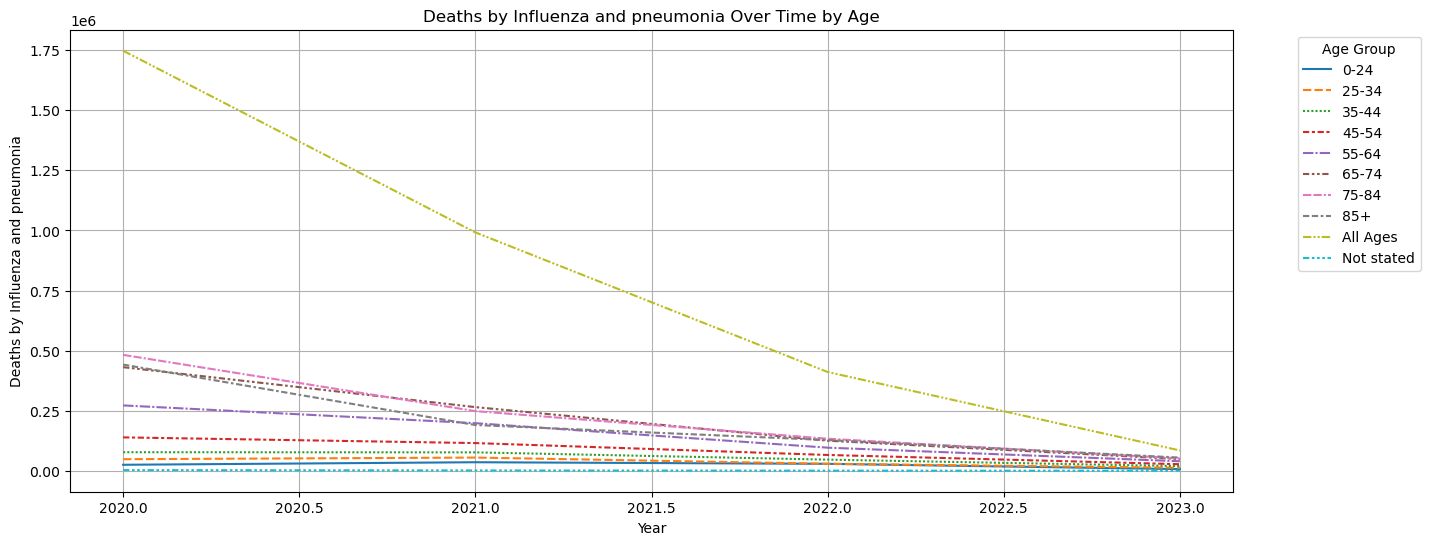

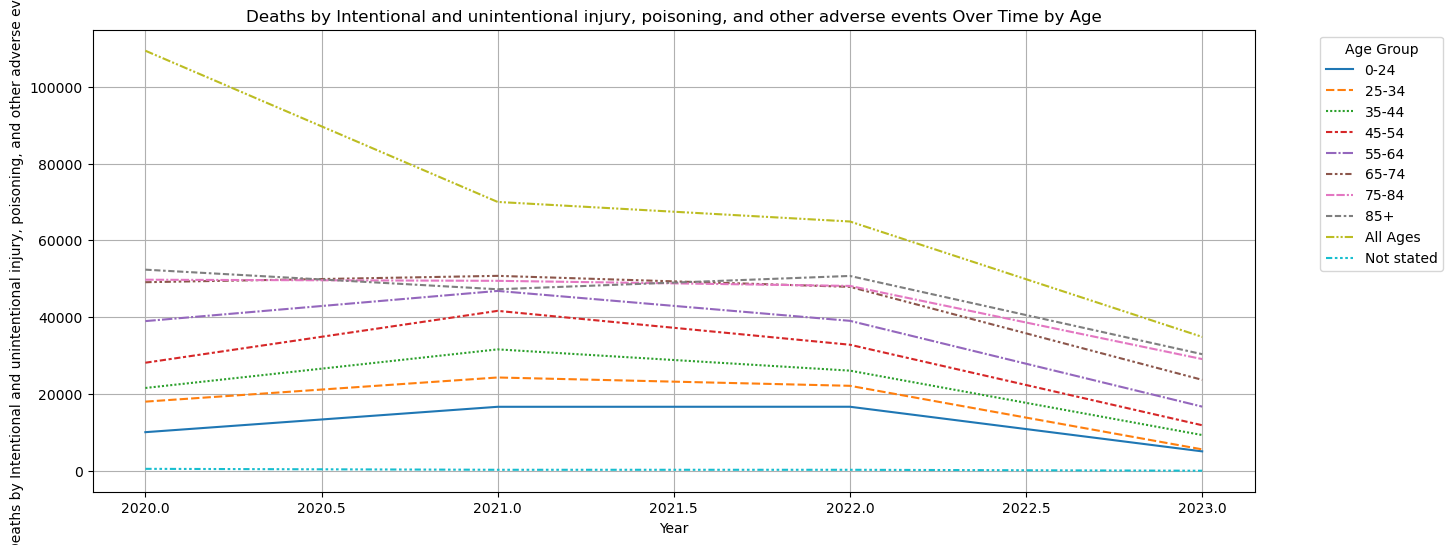

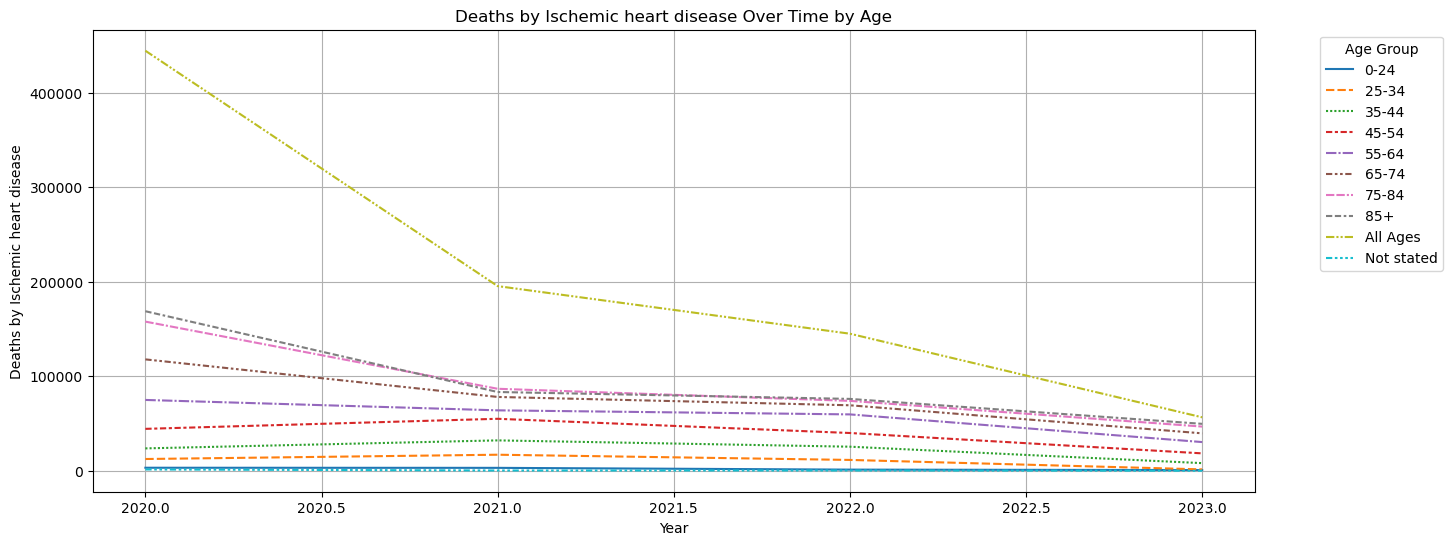

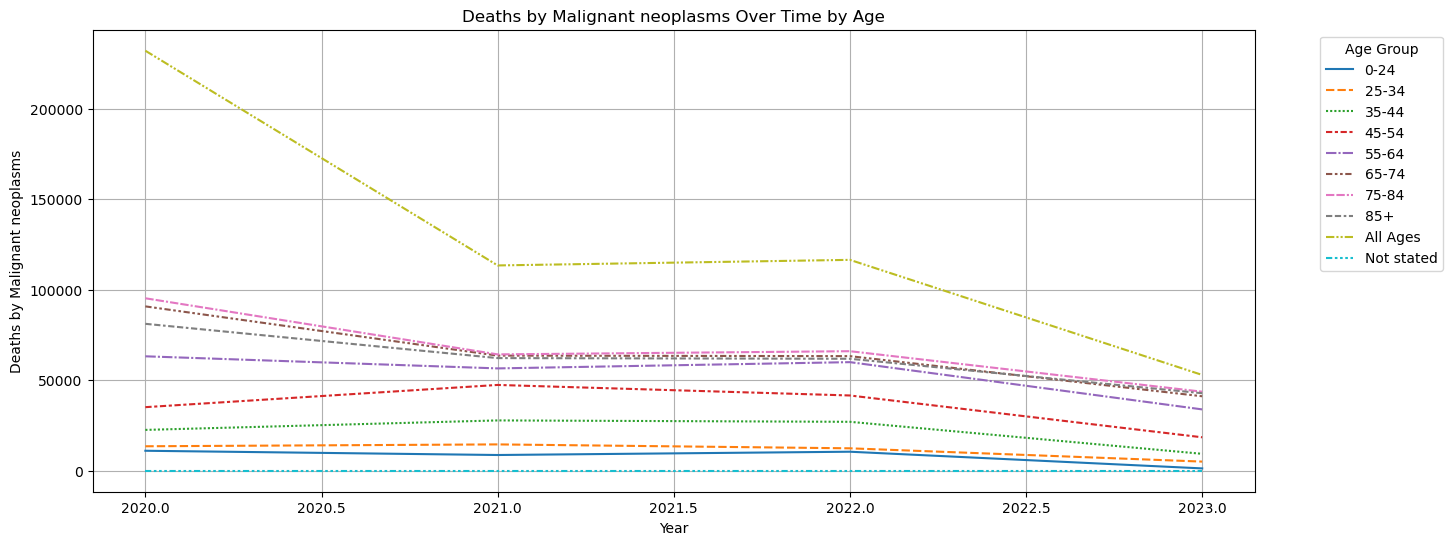

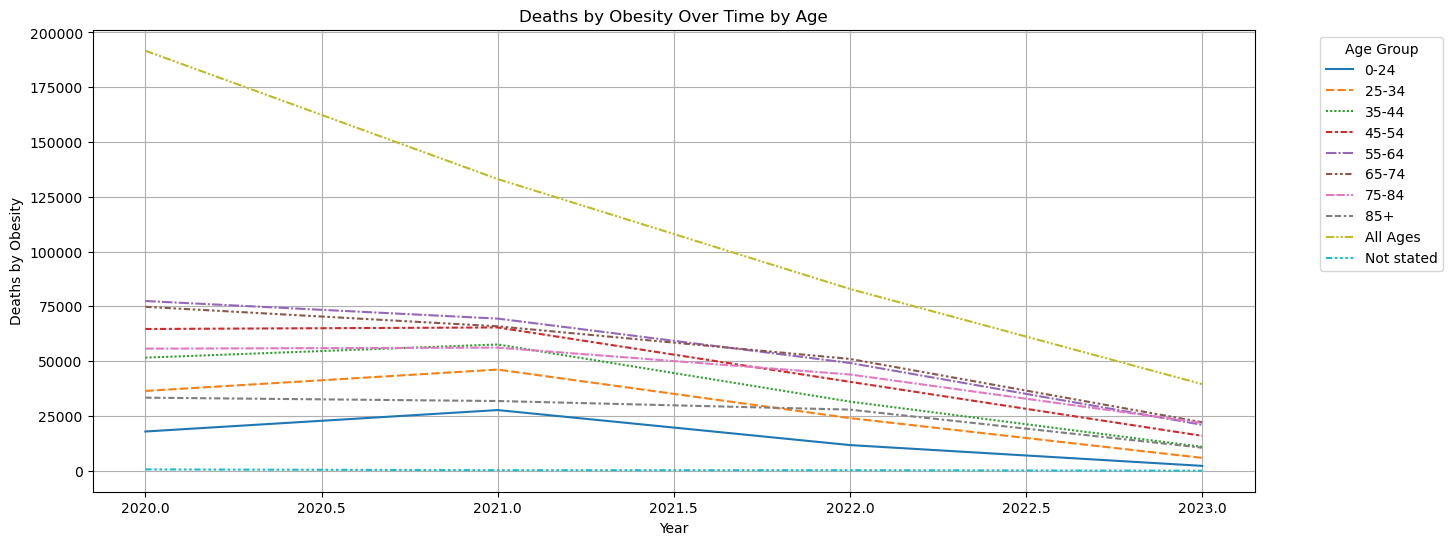

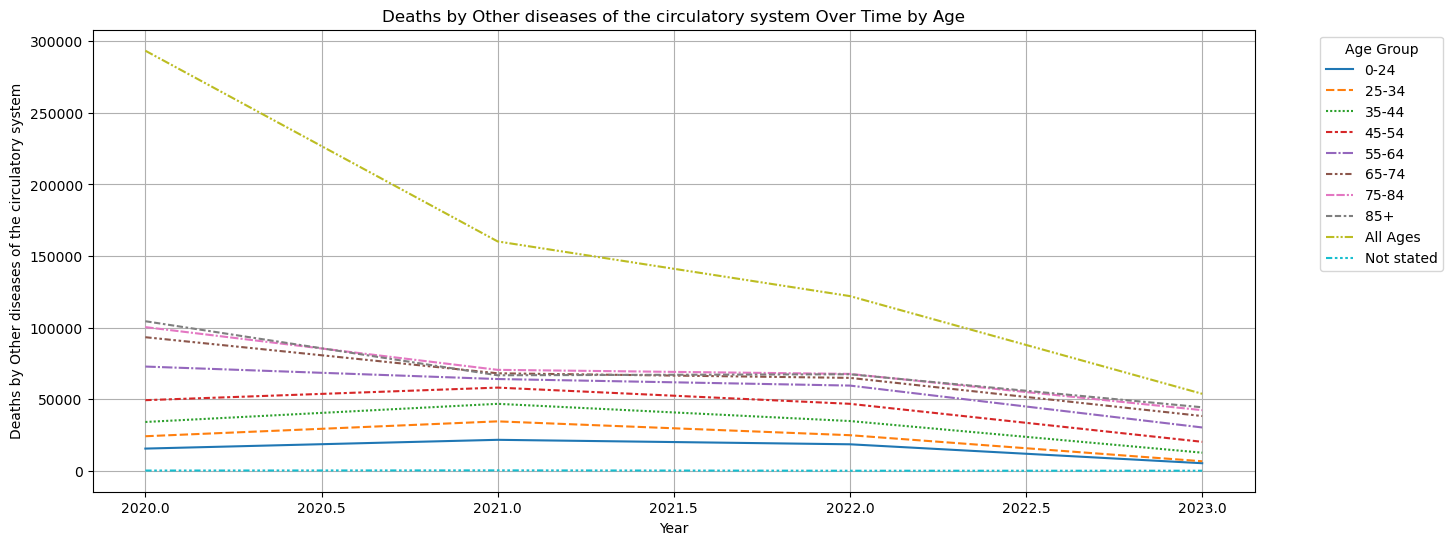

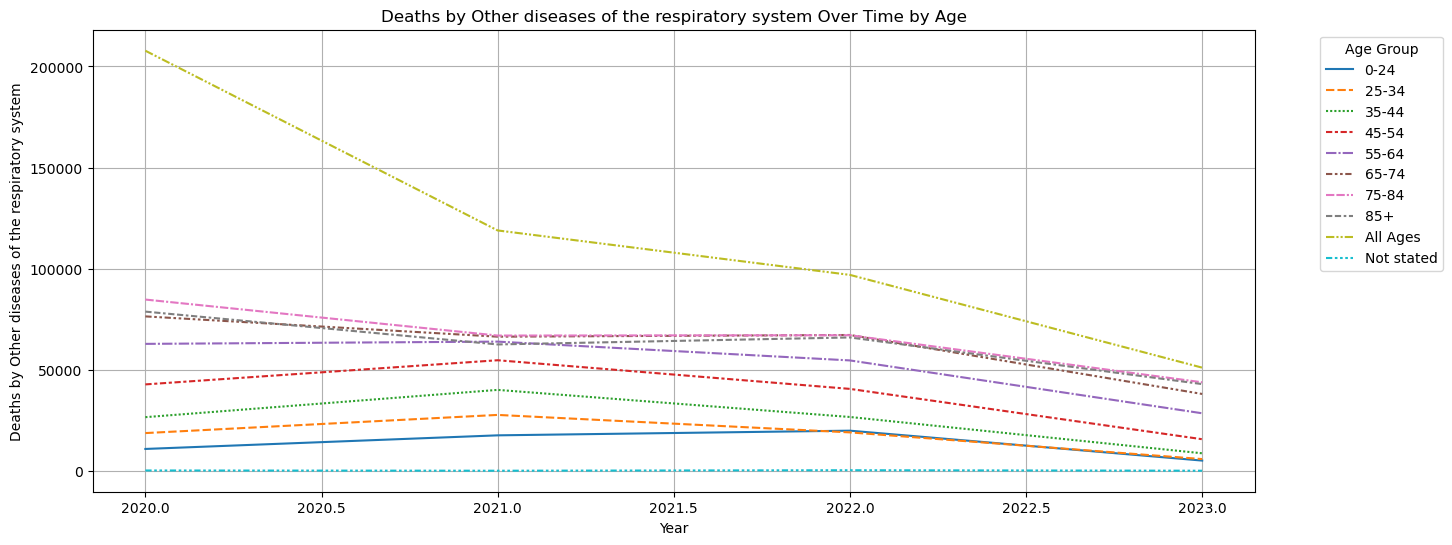

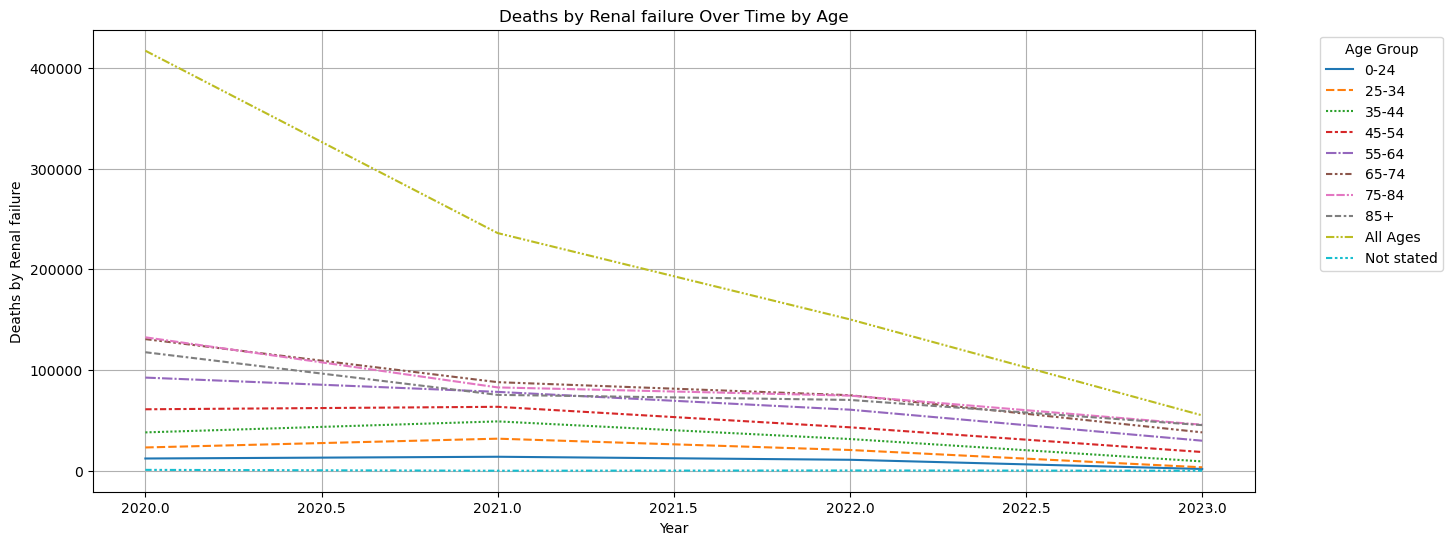

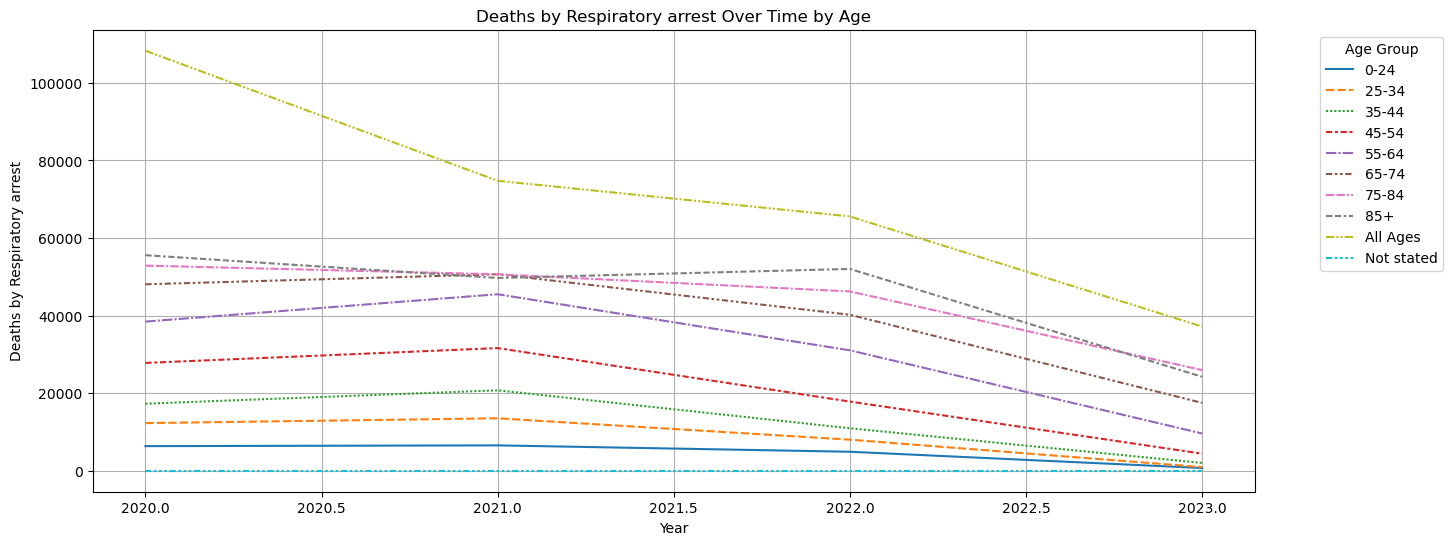

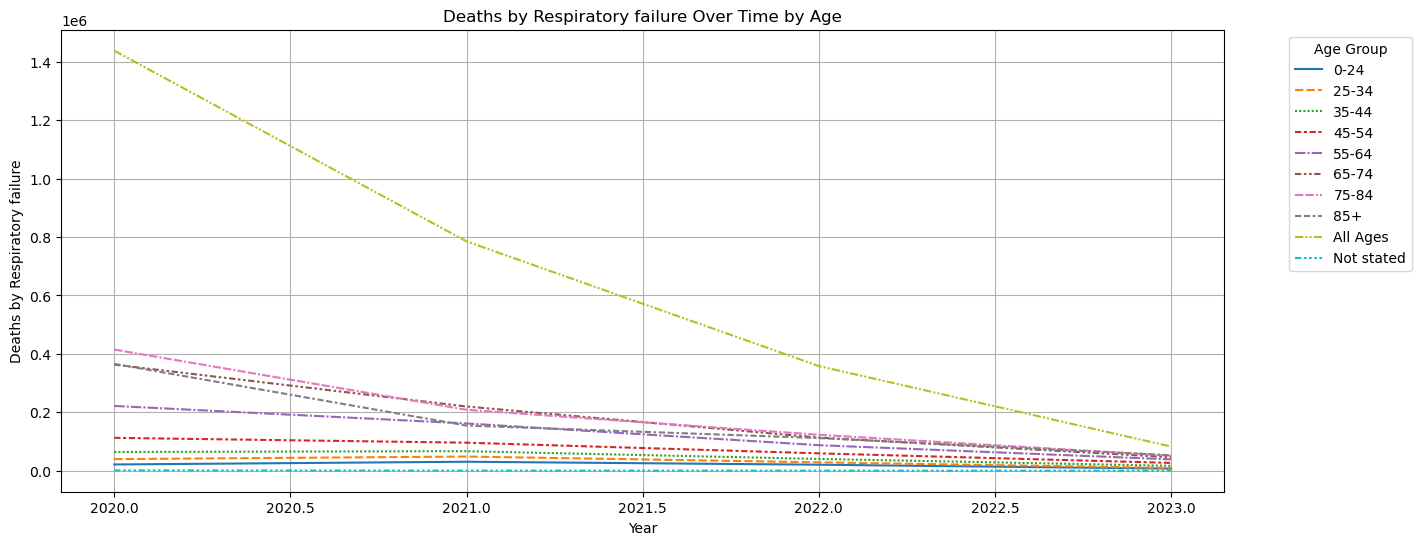

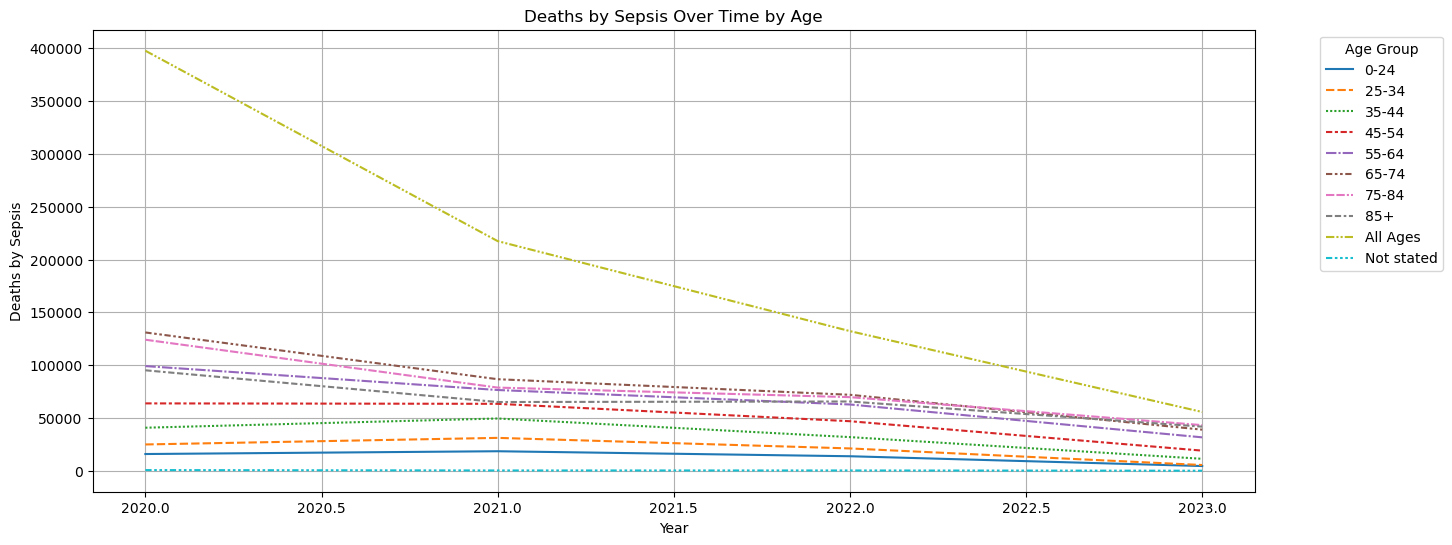

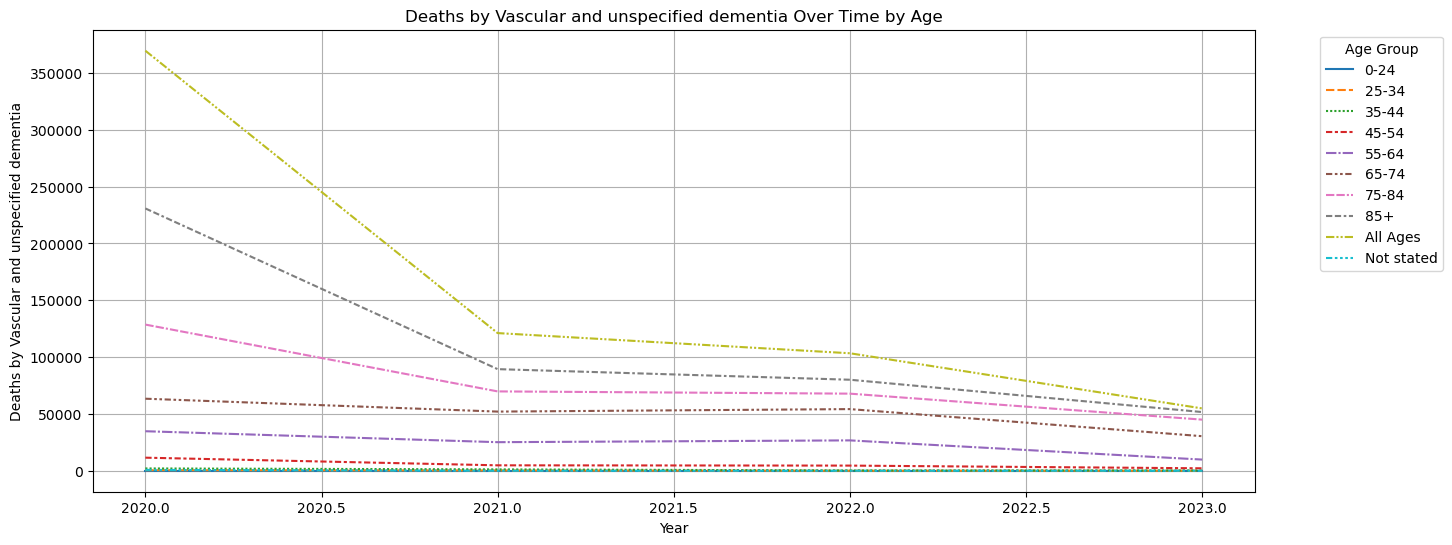

In [56]:
# Convert 'Start Date' and 'End Date' to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

# Extract the year from 'Start Date' and 'End Date'
data['Start Year'] = data['Start Date'].dt.year
data['End Year'] = data['End Date'].dt.year

# Time Series Analysis for COVID-19 Deaths by Age
time_series_covid_age = data.groupby(['Start Year', 'Age Group'])['COVID-19 Deaths'].sum()

# Time Series Analysis for Deaths by Condition by Age
time_series_condition_age = data.groupby(['Start Year', 'Age Group', 'Condition'])['COVID-19 Deaths'].sum()

# Plotting the time series data for COVID-19 Deaths by Age
plt.figure(figsize=(15, 6))
time_series_covid_age.unstack(level='Age Group').plot(marker='o')
plt.title('COVID-19 Deaths Over Time by Age')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

import seaborn as sns

# Time Series Analysis for Deaths by Condition by Age
time_series_condition_age = data.groupby(['Start Year', 'Age Group', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# Pivot the data to have conditions as columns
pivot_data = time_series_condition_age.pivot_table(index=['Start Year', 'Age Group'], columns='Condition', values='COVID-19 Deaths', fill_value=0)

# Reset the index for better visualization in the plot
pivot_data = pivot_data.reset_index()

# # Plotting the time series data for Deaths by Condition by Age using Seaborn
# plt.figure(figsize=(15, 8))
# sns.lineplot(x='Start Year', y='value', hue='Age Group', style='Condition', data=pd.melt(pivot_data, id_vars=['Start Year', 'Age Group']))
# plt.title('Deaths by Condition Over Time by Age')
# plt.xlabel('Year')
# plt.ylabel('Deaths by Condition')
# plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

# Loop over each condition and create a separate plot
for condition in time_series_condition_age['Condition'].unique():
    condition_data = time_series_condition_age[time_series_condition_age['Condition'] == condition]

    # Plotting the time series data for Deaths by Condition by Age using Seaborn
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Start Year', y='COVID-19 Deaths', hue='Age Group', style='Age Group', data=condition_data)
    plt.title(f'Deaths by {condition} Over Time by Age')
    plt.xlabel('Year')
    plt.ylabel(f'Deaths by {condition}')
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

   



In [54]:
# # Assuming 'State' is the column representing regions, modify the grouping line
# time_series_condition_age_region = data.groupby(['Start Year', 'State', 'Age Group', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# # Loop over each condition and region and create a separate plot
# for condition in time_series_condition_age_region['Condition'].unique():
#     for state in time_series_condition_age_region['State'].unique():
#         condition_region_data = time_series_condition_age_region[(time_series_condition_age_region['Condition'] == condition) & (time_series_condition_age_region['State'] == state)]

#         # Plotting the time series data for Deaths by Condition by Age and Region using Seaborn
#         plt.figure(figsize=(15, 6))
#         sns.lineplot(x='Start Year', y='COVID-19 Deaths', hue='Age Group', style='Age Group', data=condition_region_data)
#         plt.title(f'Deaths by {condition} Over Time by Age in {state}')
#         plt.xlabel('Year')
#         plt.ylabel(f'Deaths by {condition}')
#         plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.grid(True)
#         plt.show()



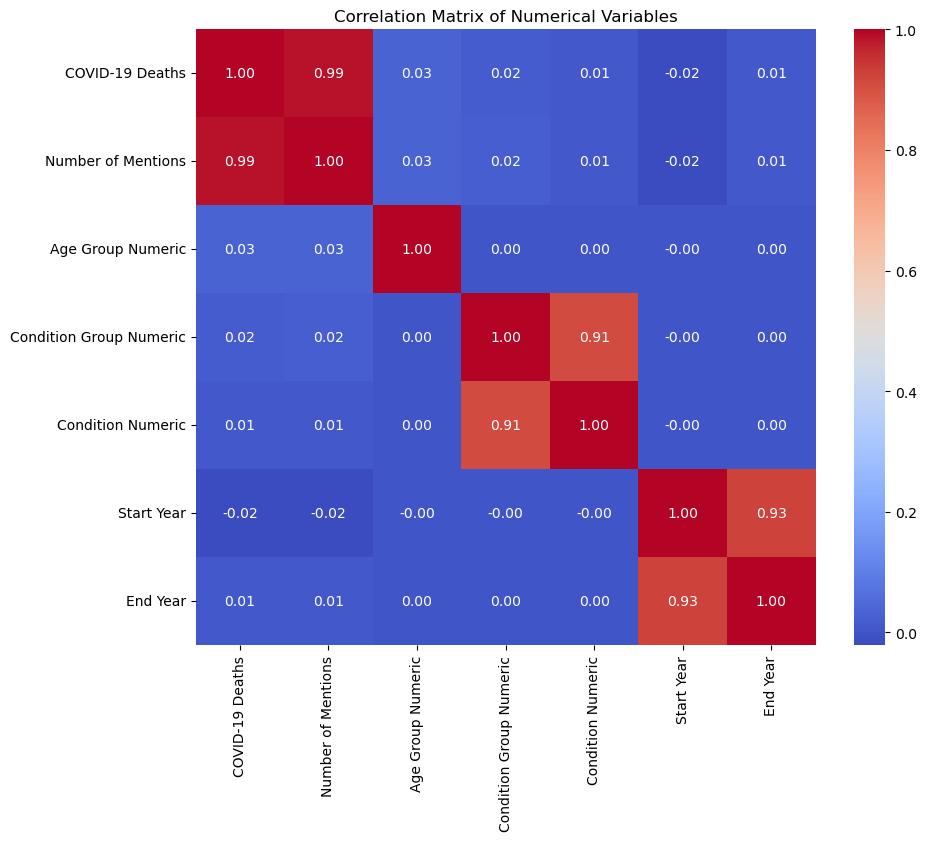

COVID-19 Deaths  Number of Mentions  \
COVID-19 Deaths                 1.000000            0.986772   
Number of Mentions              0.986772            1.000000   
Age Group Numeric               0.032344            0.032474   
Condition Group Numeric         0.016621            0.019254   
Condition Numeric               0.007464            0.009835   
Start Year                     -0.021417           -0.021255   
End Year                        0.007566            0.007940   

                         Age Group Numeric  Condition Group Numeric  \
COVID-19 Deaths               3.234353e-02             1.662098e-02   
Number of Mentions            3.247440e-02             1.925420e-02   
Age Group Numeric             1.000000e+00             4.154024e-16   
Condition Group Numeric       4.154024e-16             1.000000e+00   
Condition Numeric             5.262406e-16             9.116887e-01   
Start Year                   -5.400445e-15            -4.298265e-13   
End Year                      8.552208e-15             1.489924e-13   

                         Condition Numeric    Start Year      End Year  
COVID-19 Deaths               7.463872e-03 -2.141658e-02  7.566050e-03  
Number of Mentions            9.834570e-03 -2.125468e-02  7.939524e-03  
Age Group Numeric             5.262406e-16 -5.400445e-15  8.552208e-15  
Condition Group Numeric       9.116887e-01 -4.298265e-13  1.489924e-13  
Condition Numeric             1.000000e+00 -4.792716e-13  1.238213e-13  
Start Year                   -4.792716e-13  1.000000e+00  9.265706e-01  
End Year                      1.238213e-13  9.265706e-01  1.000000e+00

In [44]:
# Correlation Analysis
# Selecting only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int32','int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

correlation_matrix



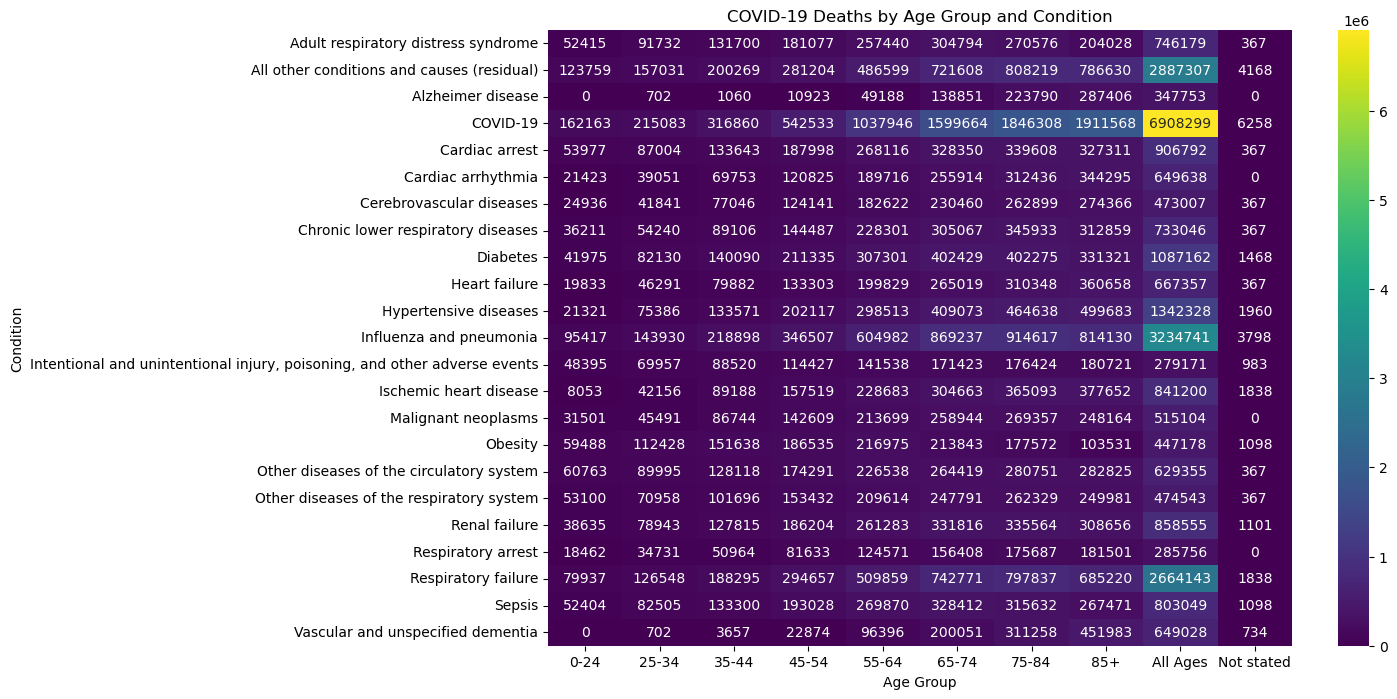

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing the data for the heatmap
heatmap_data = data.pivot_table(index='Condition', columns='Age Group', values='COVID-19 Deaths', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.title('COVID-19 Deaths by Age Group and Condition')
plt.ylabel('Condition')
plt.xlabel('Age Group')
plt.show()
